In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("updated_data.csv")
df.head()

sl.no  lattitude  longitude  demand
0      1   8.437424  76.947757      78
1      2   8.441192  76.948471     108
2      3   8.441457  76.945010     102
3      4   8.441484  76.946974      75
4      5   8.441828  76.948590      93

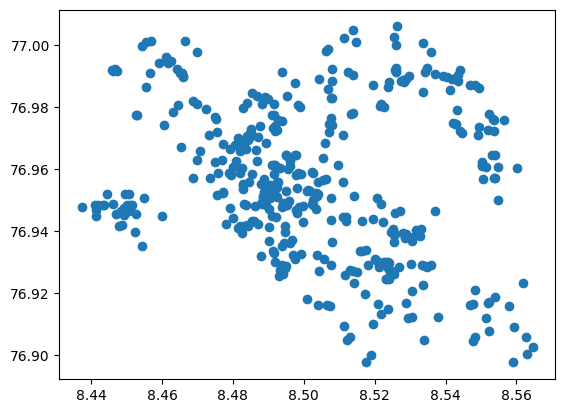

In [3]:
lat_lon = df[["lattitude","longitude"]]
X = lat_lon.to_numpy()
plt.scatter(X[:,0],X[:,1])

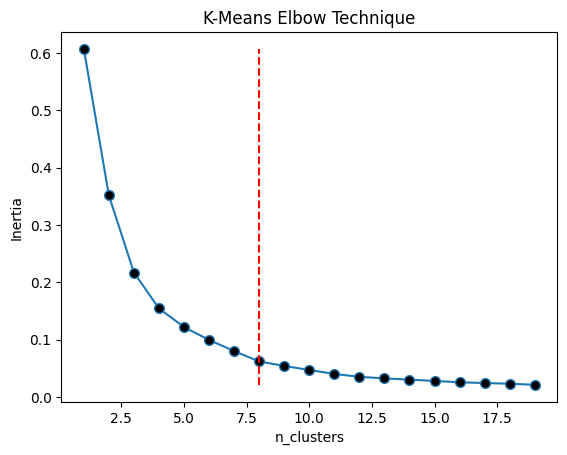

In [4]:
K_list = range(1,20)
inertia_list = []
for i in K_list:
    kmeans = KMeans(n_clusters=i,n_init=10,random_state=1234)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)
plt.plot(range(1,20), inertia_list, 'o-', markersize=7, markerfacecolor='black')
plt.xlabel('n_clusters'); plt.ylabel('Inertia'); plt.title('K-Means Elbow Technique')
plt.vlines(x = 8, ymin=min(inertia_list), ymax=max(inertia_list), color = 'r', linestyles = 'dashed')
plt.savefig("elboe.png")
plt.show()

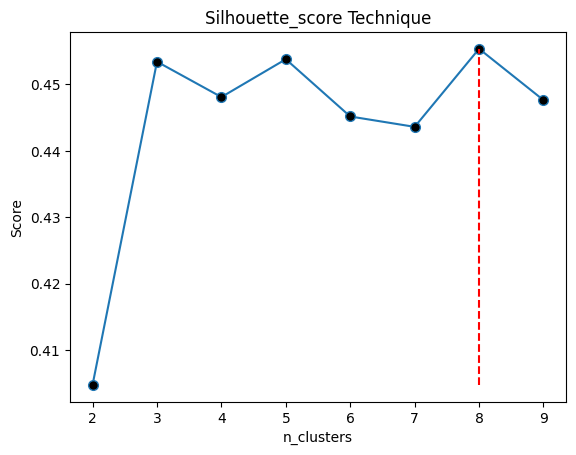

In [5]:
from sklearn.metrics import silhouette_score as ss
K_list = range(2,10)
score_list = []
for i in K_list:
    kmeans = KMeans(n_clusters=i,n_init=10,random_state=1234)
    kmeans.fit(X)
    score_list.append(ss(X,kmeans.labels_))
plt.plot(range(2,10),score_list,'o-', markersize=7, markerfacecolor='black')
plt.xlabel('n_clusters'); plt.ylabel('Score'); plt.title('Silhouette_score Technique')
plt.vlines(x = 8, ymin=min(score_list), ymax=max(score_list), color = 'r', linestyles = 'dashed')
plt.show()

In [6]:
kmeans_model = KMeans(n_clusters=8,n_init=10,random_state=1234).fit(X)
kmeans_model

KMeans(n_init=10, random_state=1234)

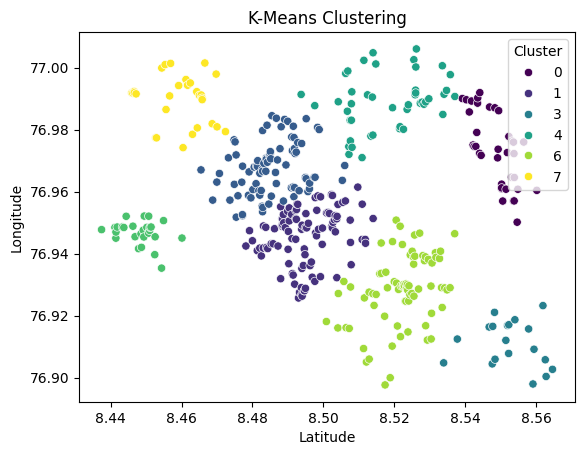

In [7]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=kmeans_model.labels_,palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [8]:
print(ss(X,kmeans_model.labels_))

0.45537493478572116


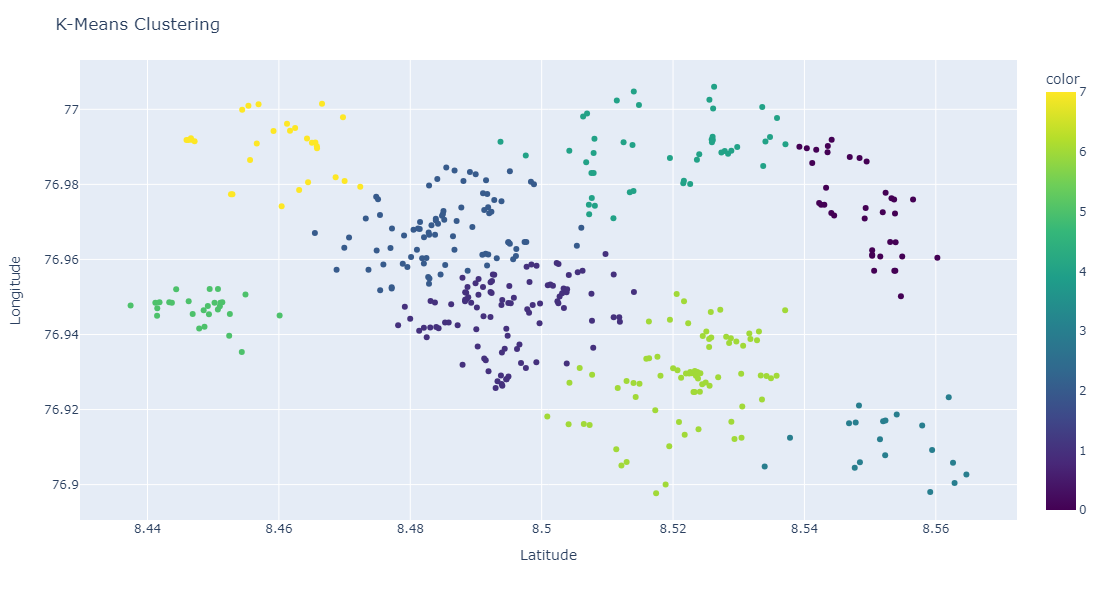

In [9]:
fig = px.scatter(x=X[:,0], y=X[:,1], color=kmeans_model.labels_, color_continuous_scale='viridis')
fig.update_layout(title='K-Means Clustering', xaxis_title='Latitude', yaxis_title='Longitude', legend_title='Cluster', width=800, height=600)
fig.show()

In [10]:
df["cluster"] = kmeans_model.labels_
df.cluster.value_counts()

cluster
1    101
2     85
6     77
4     46
0     36
7     29
5     27
3     19
Name: count, dtype: int64

In [11]:
df1 = df[df["cluster"]==0]
df2 = df[df["cluster"]==1]
df3 = df[df["cluster"]==2]
df4 = df[df["cluster"]==3]
df5 = df[df["cluster"]==4]
df6 = df[df["cluster"]==5]
df7 = df[df["cluster"]==6]
df8 = df[df["cluster"]==7]

In [12]:
def calculate_weights(df):
# Get the maximum demand value
  max_demand = df['demand'].max()

  # Create a new column named 'weight' with normalized values based on demand
  df['weight'] = (df['demand'] / max_demand) ** 2  # Square for stronger emphasis

  return df


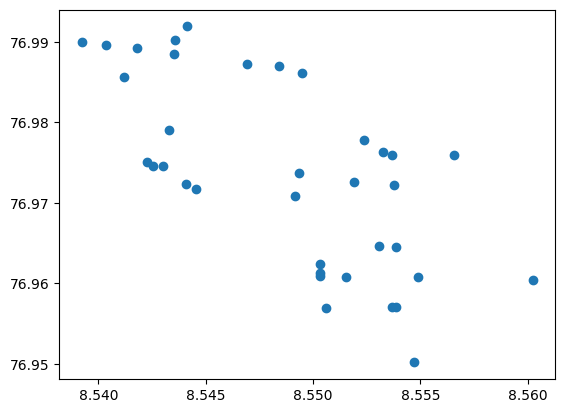

In [13]:
lat_lon1 = df1[["lattitude","longitude"]]
X1 = lat_lon1.to_numpy()

plt.scatter(X1[:,0],X1[:,1])

In [14]:
df1 = calculate_weights(df1.copy()) 
print(df1)

     sl.no  lattitude  longitude  demand  cluster    weight
367    368   8.539235  76.990019      93        0  0.631821
368    369   8.540365  76.989620      95        0  0.659288
369    370   8.541188  76.985688     111        0  0.900066
370    371   8.541797  76.989215      83        0  0.503251
371    372   8.542240  76.975025      68        0  0.337789
372    373   8.542537  76.974596     109        0  0.867923
373    374   8.543030  76.974580      58        0  0.245745
374    375   8.543297  76.979088      99        0  0.715976
375    376   8.543520  76.988537      27        0  0.053254
376    377   8.543564  76.990226      45        0  0.147929
377    378   8.544092  76.972359      84        0  0.515450
378    379   8.544146  76.991919      44        0  0.141427
379    380   8.544526  76.971700      87        0  0.552926
381    382   8.546905  76.987284      15        0  0.016437
385    386   8.548390  76.987027     108        0  0.852071
387    388   8.549173  76.970898      30

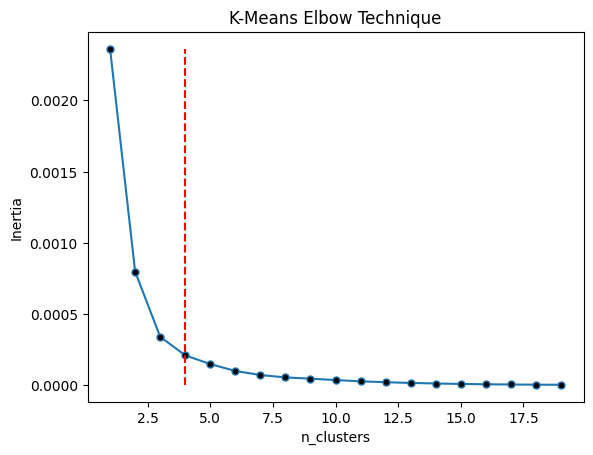

In [15]:
K_list = range(1,20)
inertia_list = []
for i in K_list:
    KM1 = KMeans(n_clusters=i,n_init=10,random_state=1234).fit(X1,sample_weight=df1["weight"])
    inertia_list.append(KM1.inertia_)
plt.plot(range(1,20), inertia_list, 'o-', markersize=5, markerfacecolor='black')
plt.xlabel('n_clusters'); plt.ylabel('Inertia'); plt.title('K-Means Elbow Technique')
plt.vlines(x = 4, ymin=min(inertia_list), ymax=max(inertia_list), color = 'r', linestyles = 'dashed')
plt.show()

In [16]:
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,n_init=10,random_state=1234).fit(X1,sample_weight=df1["weight"])
    print(f"{i}:{ss(X1,kmeans.labels_)}")

2:0.4887494682380003
3:0.5856834315289661
4:0.5975653789847309
5:0.5745458965549903
6:0.4706954713073541
7:0.5156041027241014
8:0.4844786269036192
9:0.4747476701135236


In [17]:
KM1 = KMeans(n_clusters=4,n_init=10,random_state=1234).fit(X1,sample_weight=df1["weight"])
KM1

KMeans(n_clusters=4, n_init=10, random_state=1234)

In [18]:
ss(X1,KM1.labels_)

0.5975653789847309

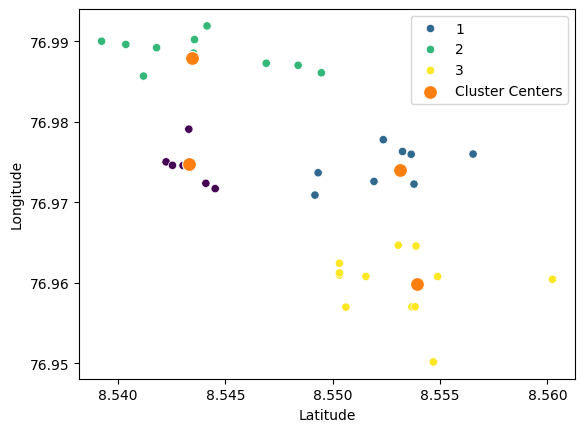

In [19]:
sns.scatterplot(x=X1[:, 0], y=X1[:, 1], hue=KM1.labels_, palette='viridis')

# Scatter plot of cluster centers
scatter = sns.scatterplot(x=KM1.cluster_centers_[:, 0], y=KM1.cluster_centers_[:, 1], s=100, label='Cluster Centers')

# Set labels for x and y axes
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Add legend for both data points and cluster centers
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles[1:], labels=labels[1:])

# Show plot
plt.show()



In [20]:
KM1.cluster_centers_

array([[ 8.54329936, 76.97478213],
       [ 8.55315226, 76.97395804],
       [ 8.54344948, 76.98798658],
       [ 8.55391519, 76.9598055 ]])

In [21]:
df1["cluster"] = KM1.labels_
demand1 = []
for i in set(KM1.labels_):
    demand1.append(df1[df1["cluster"]==i].demand.sum())
demand1 = np.array(demand1)
demand1

X1_center = np.hstack((KM1.cluster_centers_, demand1[:, np.newaxis]))

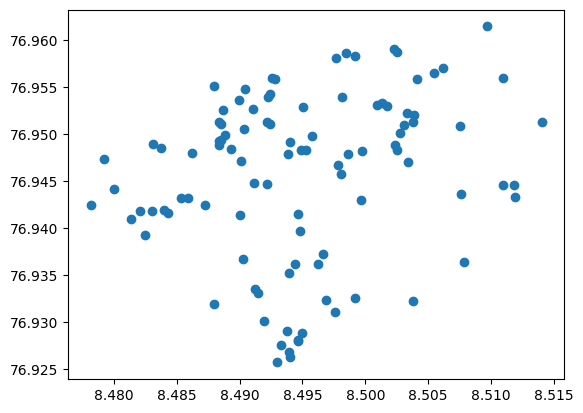

In [22]:
lat_lon_2 = df2[["lattitude","longitude"]]
X2 = lat_lon_2.to_numpy()
plt.scatter(X2[:,0],X2[:,1])

In [23]:
df2 = calculate_weights(df2.copy())

print(df2)

     sl.no  lattitude  longitude  demand  cluster    weight
72      73   8.478146  76.942477      70        1  0.346021
75      76   8.479170  76.947420      22        1  0.034178
77      78   8.479989  76.944175      81        1  0.463315
82      83   8.481355  76.940984     110        1  0.854459
87      88   8.482071  76.941804      81        1  0.463315
..     ...        ...        ...     ...      ...       ...
259    260   8.510960  76.944579      81        1  0.463315
260    261   8.510967  76.955962      63        1  0.280277
264    265   8.511809  76.944603      29        1  0.059388
265    266   8.511910  76.943363      36        1  0.091519
275    276   8.514046  76.951342      99        1  0.692112

[101 rows x 6 columns]


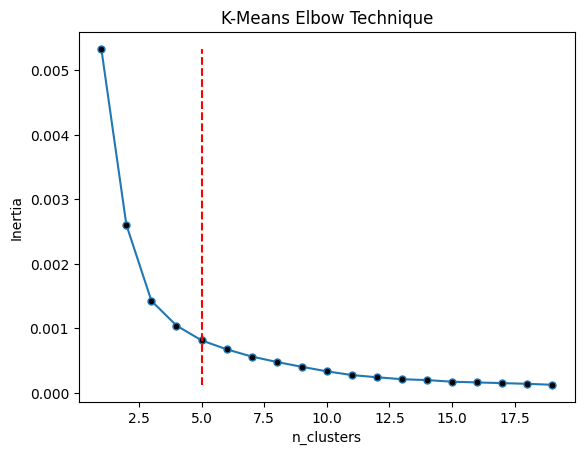

In [24]:
K_list = range(1,20)
inertia_list = []
for i in K_list:
    KM2 = KMeans(n_clusters=i,n_init=10,random_state=1234).fit(X2,sample_weight=df2["weight"])
    inertia_list.append(KM2.inertia_)
plt.plot(range(1,20), inertia_list, 'o-', markersize=5, markerfacecolor='black')
plt.xlabel('n_clusters'); plt.ylabel('Inertia'); plt.title('K-Means Elbow Technique')
plt.vlines(x = 5, ymin=min(inertia_list), ymax=max(inertia_list), color = 'r', linestyles = 'dashed')
plt.show()

In [25]:
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,n_init=10,random_state=1234).fit(X2,sample_weight=df2["weight"])
    print(f"{i}:{ss(X2,kmeans.labels_)}")

2:0.42072153556210984
3:0.4652863352774164
4:0.4504472525063084
5:0.4278467860808221
6:0.4537765926776577
7:0.43732706145752787
8:0.3742431842714477
9:0.38742939285798694


In [26]:
KM2 = KMeans(n_clusters=5,n_init=10,random_state=1234).fit(X2,sample_weight=df2["weight"])
KM2

KMeans(n_clusters=5, n_init=10, random_state=1234)

In [27]:
ss(X2,KM2.labels_)

0.4278467860808221

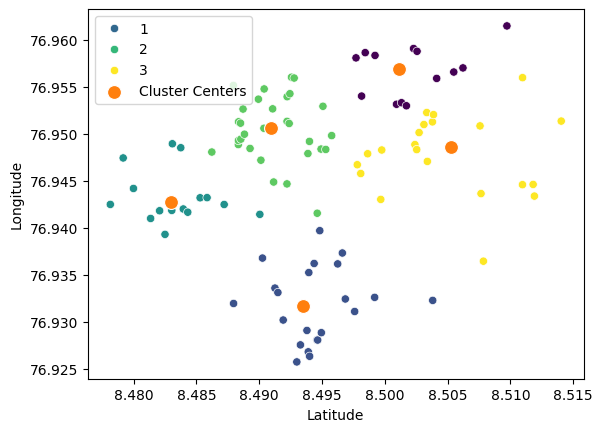

In [28]:
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=KM2.labels_,palette='viridis')
sns.scatterplot(x=KM2.cluster_centers_[:,0], y=KM2.cluster_centers_[:,1],s=100, label='Cluster Centers')
# Set labels for x and y axes
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Add legend for both data points and cluster centers
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles[1:], labels=labels[1:])

# Show plot
plt.show()


In [29]:
 KM2.cluster_centers_

array([[ 8.50114881, 76.95688193],
       [ 8.49350885, 76.93163997],
       [ 8.48297355, 76.94275079],
       [ 8.49094277, 76.95057625],
       [ 8.50527068, 76.94854734]])

In [30]:
df2["cluster"] = KM2.labels_
demand2 = []
for i in set(KM2.labels_):
    demand2.append(df2[df2["cluster"]==i].demand.sum())
demand2 = np.array(demand2)
demand2

X2_center = np.hstack((KM2.cluster_centers_, demand2[:, np.newaxis]))

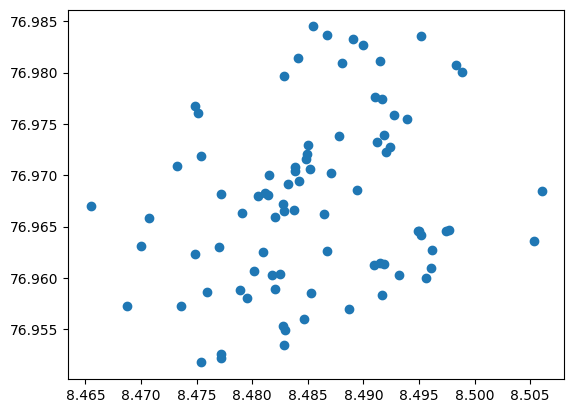

In [31]:
lat_lon_3 = df3[["lattitude","longitude"]]
X3 = lat_lon_3.to_numpy()

plt.scatter(X3[:,0],X3[:,1])

In [32]:
df3 = calculate_weights(df3.copy())
print(df3)

     sl.no  lattitude  longitude  demand  cluster    weight
48      49   8.465478  76.967013      84        2  0.490000
54      55   8.468781  76.957275      40        2  0.111111
56      57   8.469955  76.963082      99        2  0.680625
58      59   8.470677  76.965864      86        2  0.513611
60      61   8.473224  76.970912      24        2  0.040000
..     ...        ...        ...     ...      ...       ...
203    204   8.497663  76.964641      50        2  0.173611
208    209   8.498370  76.980719     105        2  0.765625
211    212   8.498826  76.980010      73        2  0.370069
235    236   8.505356  76.963639      27        2  0.050625
238    239   8.506037  76.968423      15        2  0.015625

[85 rows x 6 columns]


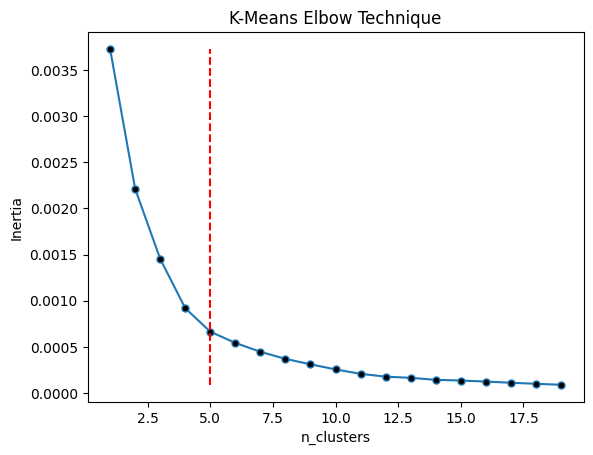

In [33]:
K_list = range(1,20)
inertia_list = []
for i in K_list:
    KM3 = KMeans(n_clusters=i,n_init=10,random_state=1234).fit(X3,sample_weight=df3["weight"])
    inertia_list.append(KM3.inertia_)
plt.plot(range(1,20), inertia_list, 'o-', markersize=5, markerfacecolor='black')
plt.xlabel('n_clusters'); plt.ylabel('Inertia'); plt.title('K-Means Elbow Technique')
plt.vlines(x = 5, ymin=min(inertia_list), ymax=max(inertia_list), color = 'r', linestyles = 'dashed')
plt.show()

In [34]:
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,n_init=10,random_state=1234).fit(X3,sample_weight=df3["weight"])
    print(f"{i}:{ss(X3,kmeans.labels_)}")

2:0.37652847630551606
3:0.38408557218181666
4:0.4439171695285107
5:0.4528663667317003
6:0.45084764562098484
7:0.4522946543903334
8:0.38977880712727947
9:0.35983443896433565


In [35]:
KM3 =KMeans(n_clusters=5,n_init=10,random_state=1234).fit(X3,sample_weight=df3["weight"])
ss(X3,KM3.labels_)

0.4528663667317003

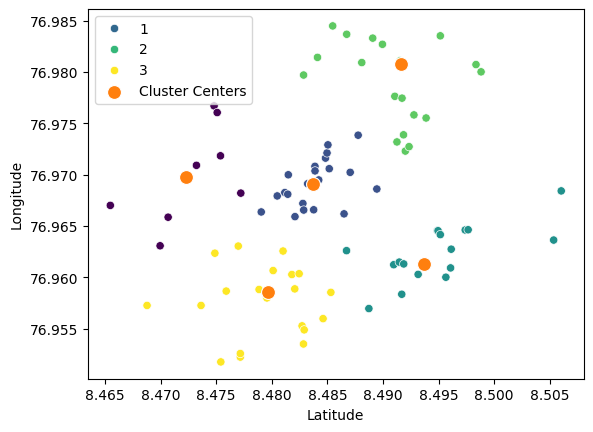

In [36]:
sns.scatterplot(x=X3[:,0], y=X3[:,1], hue=KM3.labels_,palette='viridis')
sns.scatterplot(x=KM3.cluster_centers_[:,0], y=KM3.cluster_centers_[:,1],s=100, label='Cluster Centers')
# Set labels for x and y axes
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Add legend for both data points and cluster centers
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles[1:], labels=labels[1:])

# Show plot
plt.show()


In [37]:
KM3.cluster_centers_

array([[ 8.47224587, 76.96973312],
       [ 8.48369405, 76.96906918],
       [ 8.49366999, 76.96132246],
       [ 8.49159223, 76.98074672],
       [ 8.47962662, 76.95862286]])

In [38]:
df3["cluster"] = KM3.labels_
demand3 = []
for i in set(KM3.labels_):
    demand3.append(df3[df3["cluster"]==i].demand.sum())
demand3 = np.array(demand3)
demand3

X3_center = np.hstack((KM3.cluster_centers_, demand3[:, np.newaxis]))

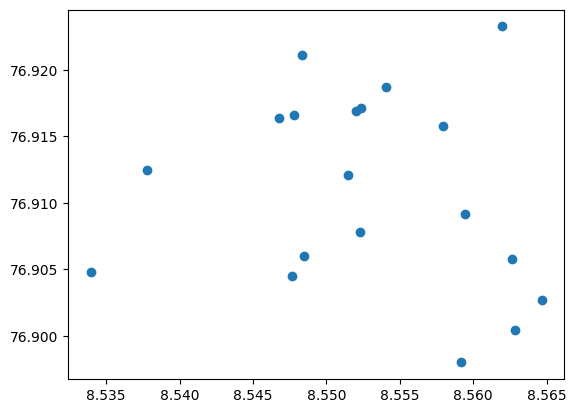

In [39]:
lat_lon_4 = df4[["lattitude","longitude"]]
X4 = lat_lon_4.to_numpy()

plt.scatter(X4[:,0],X4[:,1])

In [40]:
df4 = calculate_weights(df4.copy()) 
print(df4)

     sl.no  lattitude  longitude  demand  cluster    weight
357    358   8.533951  76.904808      35        3  0.151235
366    367   8.537806  76.912486      52        3  0.333827
380    381   8.546791  76.916380      67        3  0.554198
382    383   8.547659  76.904477      86        3  0.913086
383    384   8.547804  76.916576      28        3  0.096790
384    385   8.548303  76.921093      76        3  0.713086
386    387   8.548446  76.905981      60        3  0.444444
394    395   8.551501  76.912075      59        3  0.429753
397    398   8.551979  76.916876      72        3  0.640000
398    399   8.552293  76.907840      39        3  0.187778
399    400   8.552336  76.917102      63        3  0.490000
408    409   8.554050  76.918706      34        3  0.142716
412    413   8.557928  76.915746      31        3  0.118642
413    414   8.559149  76.898001      85        3  0.891975
414    415   8.559440  76.909200      90        3  1.000000
416    417   8.561967  76.923264      37

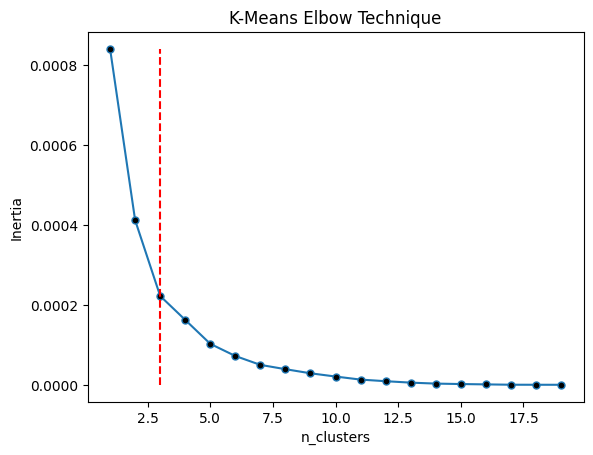

In [41]:
K_list = range(1,20)
inertia_list = []
for i in K_list:
    KM4 = KMeans(n_clusters=i,n_init=10,random_state=1234).fit(X4,sample_weight=df4["weight"])
    inertia_list.append(KM4.inertia_)
plt.plot(range(1,20), inertia_list, 'o-', markersize=5, markerfacecolor='black')
plt.xlabel('n_clusters'); plt.ylabel('Inertia'); plt.title('K-Means Elbow Technique')
plt.vlines(x = 3, ymin=min(inertia_list), ymax=max(inertia_list), color = 'r', linestyles = 'dashed')
plt.show()

In [42]:
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,n_init=10,random_state=1234).fit(X4,sample_weight=df4["weight"])
    print(f"{i}:{ss(X4,kmeans.labels_)}")

2:0.41462426479458925
3:0.4543525092575858
4:0.3172520270298744
5:0.39632597935707464
6:0.3554150943507495
7:0.38233228055201207
8:0.389797514860311
9:0.3666204163706795


In [43]:
KM4 = KMeans(n_clusters=3,n_init=10,random_state=1234).fit(X4,sample_weight=df4["weight"])
ss(X4,KM4.labels_)

0.4543525092575858

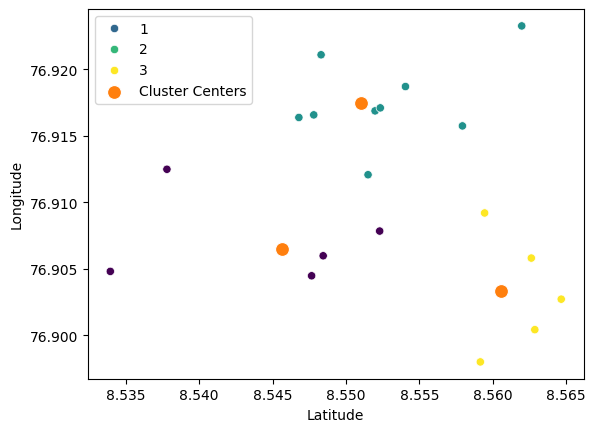

In [44]:
sns.scatterplot(x=X4[:,0], y=X4[:,1], hue=KM4.labels_,palette='viridis')
sns.scatterplot(x=KM4.cluster_centers_[:,0], y=KM4.cluster_centers_[:,1],s=100, label='Cluster Centers')
# Set labels for x and y axes
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Add legend for both data points and cluster centers
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles[1:], labels=labels[1:])

# Show plot
plt.show()


In [45]:
KM4.cluster_centers_

array([[ 8.54561859, 76.90645879],
       [ 8.55101259, 76.91745979],
       [ 8.56055427, 76.90336774]])

In [46]:
df4["cluster"] = KM4.labels_
demand4 = []
for i in set(KM4.labels_):
    demand4.append(df4[df4["cluster"]==i].demand.sum())
demand4 = np.array(demand4)
demand4

X4_center = np.hstack((KM4.cluster_centers_, demand4[:, np.newaxis]))

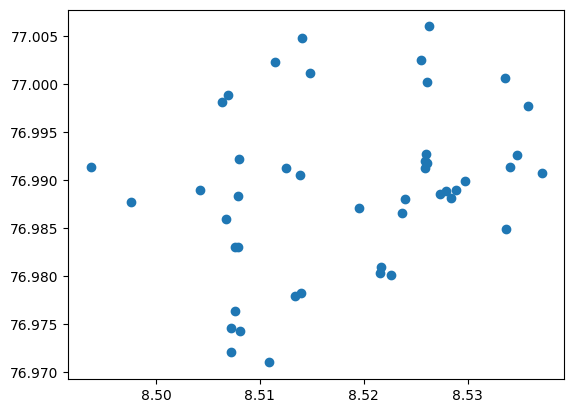

In [47]:
lat_lon_5 = df5[["lattitude","longitude"]]
X5 = lat_lon_5.to_numpy()
plt.scatter(X5[:,0],X5[:,1])

In [48]:
df5 = calculate_weights(df5.copy())

print(df5)

     sl.no  lattitude  longitude  demand  cluster    weight
172    173   8.493733  76.991340      46        4  0.149424
201    202   8.497580  76.987722      97        4  0.664430
233    234   8.504210  76.988980      84        4  0.498270
240    241   8.506310  76.998110      18        4  0.022880
242    243   8.506778  76.985923      47        4  0.155992
243    244   8.506910  76.998889      99        4  0.692112
244    245   8.507187  76.974540      87        4  0.534496
245    246   8.507230  76.972028     111        4  0.870066
247    248   8.507574  76.983026      98        4  0.678201
249    250   8.507630  76.976360      16        4  0.018078
253    254   8.507909  76.988336      71        4  0.355978
254    255   8.507913  76.983026      59        4  0.245816
255    256   8.508036  76.992181      48        4  0.162700
256    257   8.508099  76.974300      23        4  0.037356
258    259   8.510925  76.970972      89        4  0.559353
262    263   8.511437  77.002336     102

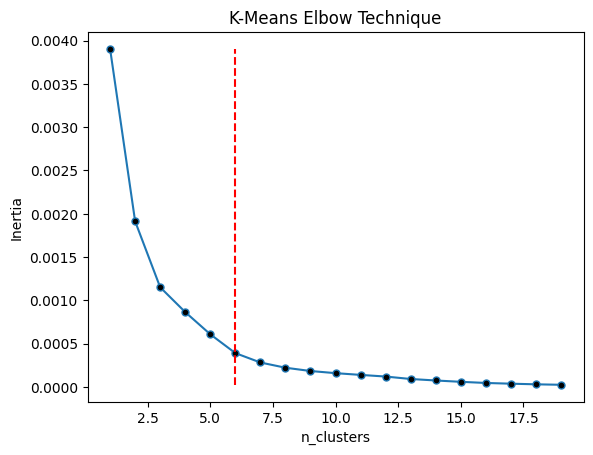

In [49]:
K_list = range(1,20)
inertia_list = []
for i in K_list:
    KM5 = KMeans(n_clusters=i,n_init=10,random_state=1234).fit(X5,sample_weight=df5["weight"])
    inertia_list.append(KM5.inertia_)
plt.plot(range(1,20), inertia_list, 'o-', markersize=5, markerfacecolor='black')
plt.xlabel('n_clusters'); plt.ylabel('Inertia'); plt.title('K-Means Elbow Technique')
plt.vlines(x = 6, ymin=min(inertia_list), ymax=max(inertia_list), color = 'r', linestyles = 'dashed')
plt.show()

In [50]:
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,n_init=10,random_state=1234).fit(X5,sample_weight=df5["weight"])
    print(f"{i}:{ss(X5,kmeans.labels_)}")

2:0.4374064896398225
3:0.4663478602393673
4:0.4381358538170356
5:0.4419889757733417
6:0.43945259508082973
7:0.4691155384322063
8:0.4729409188346691
9:0.49875132833015556


In [51]:
KM5 = KMeans(n_clusters=6,n_init=10,random_state=1234).fit(X5,sample_weight=df5["weight"])
ss(X5,KM5.labels_)

0.43945259508082973

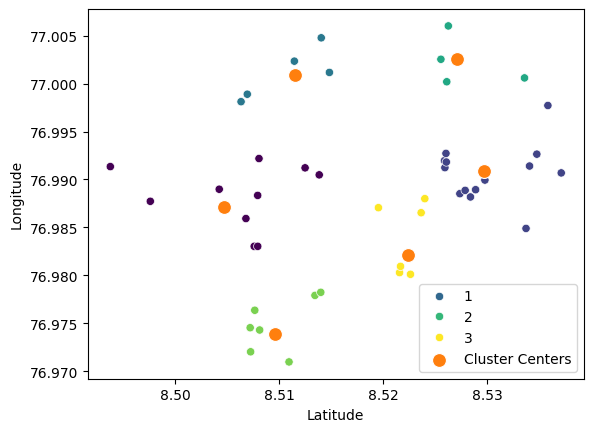

In [52]:
sns.scatterplot(x=X5[:,0], y=X5[:,1], hue=KM5.labels_,palette='viridis')
sns.scatterplot(x=KM5.cluster_centers_[:,0], y=KM5.cluster_centers_[:,1],s=100, label='Cluster Centers')
# Set labels for x and y axes
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Add legend for both data points and cluster centers
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles[1:], labels=labels[1:])

# Show plot
plt.show()


In [53]:
KM5.cluster_centers_

array([[ 8.50464919, 76.98715724],
       [ 8.52965966, 76.99083198],
       [ 8.51149662, 77.00089014],
       [ 8.52707501, 77.00257778],
       [ 8.50961065, 76.97387795],
       [ 8.52233472, 76.98216635]])

In [54]:
df5["cluster"] = KM5.labels_
demand5 = []
for i in set(KM5.labels_):
    demand5.append(df5[df5["cluster"]==i].demand.sum())
demand5 = np.array(demand5)
demand5

X5_center = np.hstack((KM5.cluster_centers_, demand5[:, np.newaxis]))

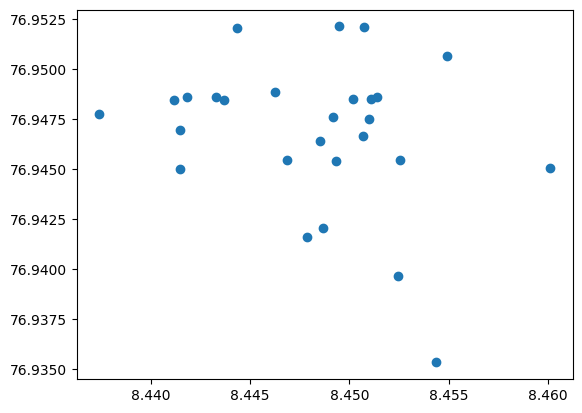

In [55]:
lat_lon_6 = df6[["lattitude","longitude"]]
X6 = lat_lon_6.to_numpy()

plt.scatter(X6[:,0],X6[:,1])

In [56]:
df6 = calculate_weights(df6.copy())

print(df6)

    sl.no  lattitude  longitude  demand  cluster    weight
0       1   8.437424  76.947757      78        5  0.422500
1       2   8.441192  76.948471     108        5  0.810000
2       3   8.441457  76.945010     102        5  0.722500
3       4   8.441484  76.946974      75        5  0.390625
4       5   8.441828  76.948590      93        5  0.600625
5       6   8.443303  76.948620      86        5  0.513611
6       7   8.443710  76.948450      66        5  0.302500
7       8   8.444363  76.952060      28        5  0.054444
10     11   8.446265  76.948866      82        5  0.466944
13     14   8.446875  76.945464      20        5  0.027778
15     16   8.447867  76.941620      92        5  0.587778
16     17   8.448546  76.946427      68        5  0.321111
17     18   8.448674  76.942049      85        5  0.501736
18     19   8.449183  76.947585      59        5  0.241736
19     20   8.449353  76.945397      76        5  0.401111
20     21   8.449462  76.952129      57        5  0.2256

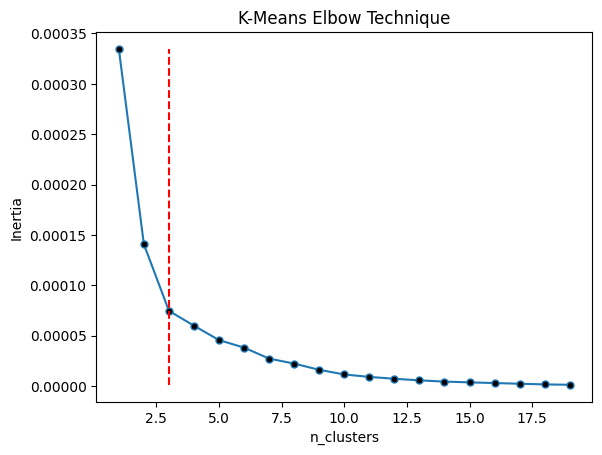

In [57]:
K_list = range(1,20)
inertia_list = []
for i in K_list:
    KM6 = KMeans(n_clusters=i,n_init=10,random_state=1234).fit(X6,sample_weight=df6["weight"])
    inertia_list.append(KM6.inertia_)
plt.plot(range(1,20), inertia_list, 'o-', markersize=5, markerfacecolor='black')
plt.xlabel('n_clusters'); plt.ylabel('Inertia'); plt.title('K-Means Elbow Technique')
plt.vlines(x = 3, ymin=min(inertia_list), ymax=max(inertia_list), color = 'r', linestyles = 'dashed')
plt.show()

In [58]:
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,n_init=10,random_state=1234).fit(X6,sample_weight=df6["weight"])
    print(f"{i}:{ss(X6,kmeans.labels_)}")

2:0.4306011321083674
3:0.45568640636259433
4:0.36858851005557475
5:0.3692301263040625
6:0.3465221687517176
7:0.38361135918708356
8:0.35770747074526243
9:0.3255904878273385


In [59]:
KM6 = KMeans(n_clusters=3,n_init=10,random_state=1234).fit(X6,sample_weight=df6["weight"])
ss(X6,KM6.labels_)

0.45568640636259433

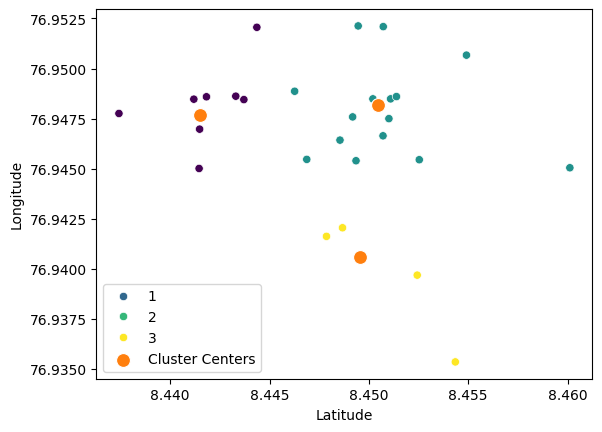

In [60]:
sns.scatterplot(x=X6[:,0], y=X6[:,1], hue=KM6.labels_,palette='viridis')
sns.scatterplot(x=KM6.cluster_centers_[:,0], y=KM6.cluster_centers_[:,1],s=100, label='Cluster Centers')
# Set labels for x and y axes
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Add legend for both data points and cluster centers
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles[1:], labels=labels[1:])

# Show plot
plt.show()


In [61]:
X6_center = KM6.cluster_centers_

In [62]:
df6["cluster"] = KM6.labels_
demand6 = []
for i in set(KM6.labels_):
    demand6.append(df6[df6["cluster"]==i].demand.sum())
demand6 = np.array(demand6)
demand6

X6_center = np.hstack((KM6.cluster_centers_, demand6[:, np.newaxis]))

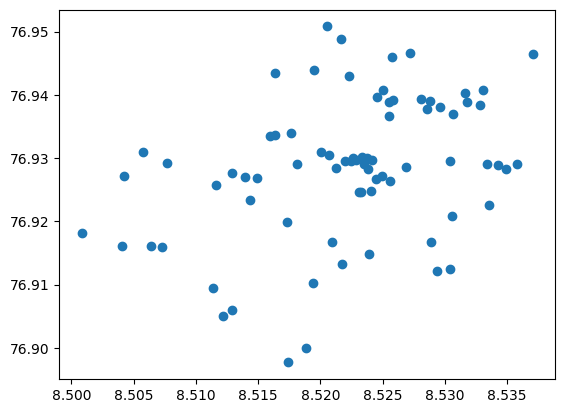

In [63]:
lat_lon_7 = df7[["lattitude","longitude"]]
X7 = lat_lon_7.to_numpy()
plt.scatter(X7[:,0],X7[:,1])

In [64]:
df7 = calculate_weights(df7.copy())  
print(df7)

     sl.no  lattitude  longitude  demand  cluster    weight
216    217   8.500857  76.918131      48        6  0.168310
231    232   8.504100  76.916070      28        6  0.057272
234    235   8.504230  76.927160      21        6  0.032216
237    238   8.505790  76.931050     105        6  0.805391
241    242   8.506419  76.916153      22        6  0.035357
..     ...        ...        ...     ...      ...       ...
354    355   8.533539  76.922667      77        6  0.433121
359    360   8.534229  76.928957     117        6  1.000000
361    362   8.534908  76.928347      23        6  0.038644
362    363   8.535762  76.929029      74        6  0.400029
364    365   8.537066  76.946443     102        6  0.760026

[77 rows x 6 columns]


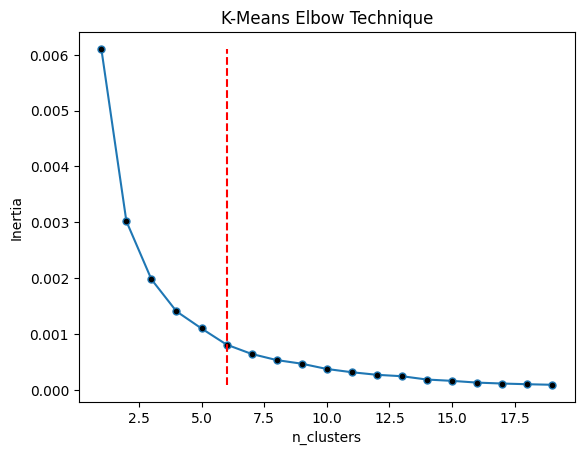

In [65]:
K_list = range(1,20)
inertia_list = []
for i in K_list:
    KM7 = KMeans(n_clusters=i,n_init=10,random_state=1234).fit(X7,sample_weight=df7["weight"])
    inertia_list.append(KM7.inertia_)
plt.plot(range(1,20), inertia_list, 'o-', markersize=5, markerfacecolor='black')
plt.xlabel('n_clusters'); plt.ylabel('Inertia'); plt.title('K-Means Elbow Technique')
plt.vlines(x = 6, ymin=min(inertia_list), ymax=max(inertia_list), color = 'r', linestyles = 'dashed')
plt.show()

In [66]:
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,n_init=10,random_state=1234).fit(X7,sample_weight=df7["weight"])
    print(f"{i}:{ss(X7,kmeans.labels_)}")

2:0.4044380747050973
3:0.3917202419360506
4:0.43951669406780913
5:0.44331682566749603
6:0.45831211155829976
7:0.4487605518543555
8:0.4660370731255319
9:0.4816039130683534


In [67]:
KM7 = KMeans(n_clusters=6,n_init=10,random_state=1234).fit(X7,sample_weight=df7["weight"])
ss(X7,KM7.labels_)

0.45831211155829976

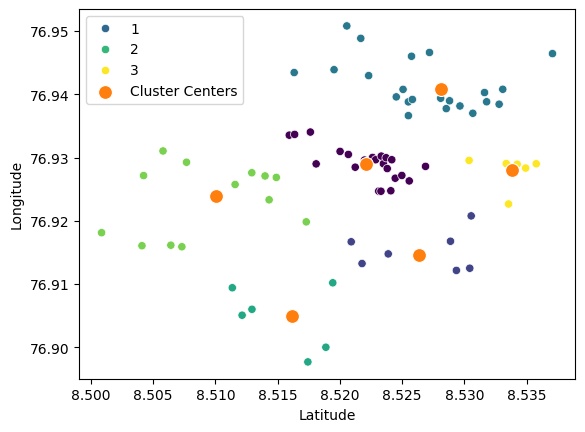

In [68]:
sns.scatterplot(x=X7[:,0], y=X7[:,1], hue=KM7.labels_,palette='viridis')
sns.scatterplot(x=KM7.cluster_centers_[:,0], y=KM7.cluster_centers_[:,1],s=100, label='Cluster Centers')
# Set labels for x and y axes
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Add legend for both data points and cluster centers
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles[1:], labels=labels[1:])

# Show plot
plt.show()


In [69]:
KM7.cluster_centers_

array([[ 8.52210699, 76.92895439],
       [ 8.52631197, 76.91454361],
       [ 8.52812993, 76.94088986],
       [ 8.51613677, 76.90493333],
       [ 8.51008477, 76.92395406],
       [ 8.53383163, 76.92809276]])

In [70]:
df7["cluster"] = KM7.labels_
demand7 = []
for i in set(KM7.labels_):
    demand7.append(df7[df7["cluster"]==i].demand.sum())
demand7 = np.array(demand7)
demand7

X7_center = np.hstack((KM7.cluster_centers_, demand7[:, np.newaxis]))

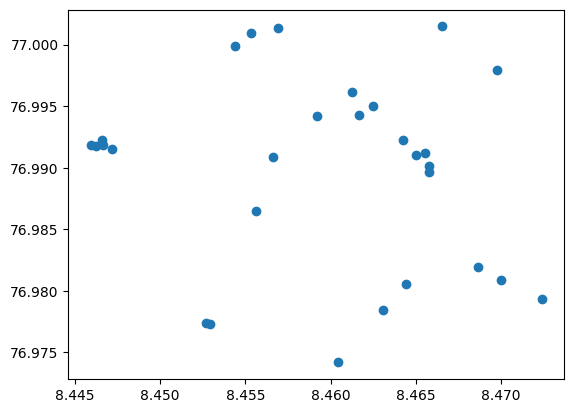

In [71]:
lat_lon_8 = df8[["lattitude","longitude"]]
X8 = lat_lon_8.to_numpy()
plt.scatter(X8[:,0],X8[:,1])

In [72]:
df8 = calculate_weights(df8.copy()) 

print(df8)

    sl.no  lattitude  longitude  demand  cluster    weight
8       9   8.445939  76.991854      50        7  0.199298
9      10   8.446222  76.991791      68        7  0.368622
11     12   8.446605  76.992286      59        7  0.277503
12     13   8.446654  76.991862     106        7  0.895727
14     15   8.447166  76.991517      42        7  0.140625
29     30   8.452704  76.977354      91        7  0.660156
30     31   8.452925  76.977348     110        7  0.964605
32     33   8.454410  76.999865      67        7  0.357860
34     35   8.455359  77.000958      67        7  0.357860
35     36   8.455611  76.986482      68        7  0.368622
36     37   8.456631  76.990867     100        7  0.797194
37     38   8.456902  77.001348      65        7  0.336814
38     39   8.459182  76.994198      68        7  0.368622
40     41   8.460419  76.974185      71        7  0.401865
41     42   8.461235  76.996146     112        7  1.000000
42     43   8.461690  76.994304     111        7  0.9822

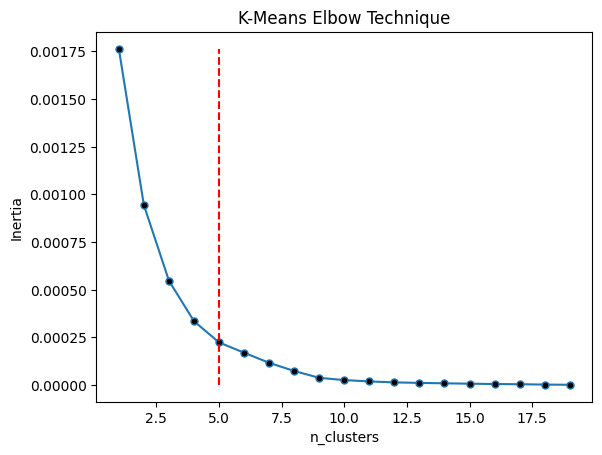

In [73]:
K_list = range(1,20)
inertia_list = []
for i in K_list:
    KM8 = KMeans(n_clusters=i,n_init=10,random_state=1234).fit(X8,sample_weight=df8["weight"])
    inertia_list.append(KM8.inertia_)
plt.plot(range(1,20), inertia_list, 'o-', markersize=5, markerfacecolor='black')
plt.xlabel('n_clusters'); plt.ylabel('Inertia'); plt.title('K-Means Elbow Technique')
plt.vlines(x = 5, ymin=min(inertia_list), ymax=max(inertia_list), color = 'r', linestyles = 'dashed')
plt.show()

In [74]:
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,n_init=10,random_state=1234).fit(X8,sample_weight=df8["weight"])
    print(f"{i}:{ss(X8,kmeans.labels_)}")

2:0.4221327250427077
3:0.4730803812688955
4:0.5069540102585841
5:0.48598799708948914
6:0.5135331637985423
7:0.5906501373866564
8:0.5930256842132509
9:0.6728261857043051


In [75]:
KM8 = KMeans(n_clusters=5,n_init=10,random_state=1234).fit(X8,sample_weight=df8["weight"])
ss(X8,KM8.labels_)

0.48598799708948914

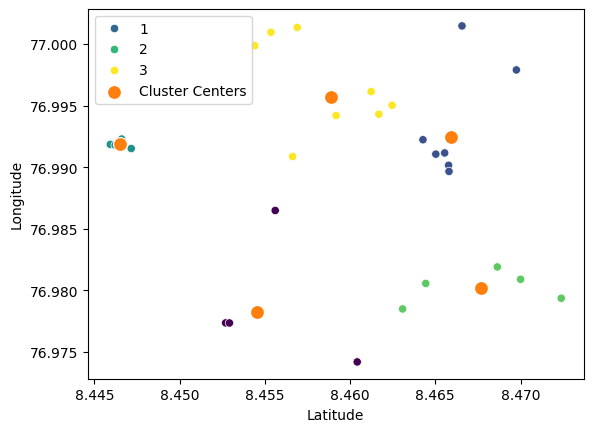

In [76]:
sns.scatterplot(x=X8[:,0], y=X8[:,1], hue=KM8.labels_,palette='viridis')
sns.scatterplot(x=KM8.cluster_centers_[:,0], y=KM8.cluster_centers_[:,1],s=100, label='Cluster Centers')
# Set labels for x and y axes
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Add legend for both data points and cluster centers
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles[1:], labels=labels[1:])

# Show plot
plt.show()


In [77]:
KM8.cluster_centers_

array([[ 8.45453484, 76.97822469],
       [ 8.46590775, 76.9924412 ],
       [ 8.44652478, 76.9918839 ],
       [ 8.46770804, 76.98022129],
       [ 8.45889695, 76.99567943]])

In [78]:
df8["cluster"] = KM8.labels_
demand8 = []
for i in set(KM8.labels_):
    demand8.append(df8[df8["cluster"]==i].demand.sum())
demand8 = np.array(demand8)
demand8

X8_center = np.hstack((KM8.cluster_centers_, demand8[:, np.newaxis]))

In [79]:
cluster_center = np.concatenate((X1_center,X2_center,X3_center,X4_center,X5_center,X6_center,X7_center,X8_center))
cluster_center

array([[   8.54329936,   76.97478213,  505.        ],
       [   8.55315226,   76.97395804,  422.        ],
       [   8.54344948,   76.98798658,  706.        ],
       [   8.55391519,   76.9598055 ,  743.        ],
       [   8.50114881,   76.95688193, 1009.        ],
       [   8.49350885,   76.93163997, 1524.        ],
       [   8.48297355,   76.94275079,  863.        ],
       [   8.49094277,   76.95057625, 1936.        ],
       [   8.50527068,   76.94854734, 1202.        ],
       [   8.47224587,   76.96973312,  606.        ],
       [   8.48369405,   76.96906918, 1754.        ],
       [   8.49366999,   76.96132246,  898.        ],
       [   8.49159223,   76.98074672, 1088.        ],
       [   8.47962662,   76.95862286, 1223.        ],
       [   8.54561859,   76.90645879,  272.        ],
       [   8.55101259,   76.91745979,  467.        ],
       [   8.56055427,   76.90336774,  320.        ],
       [   8.50464919,   76.98715724,  619.        ],
       [   8.52965966,   76.

In [80]:
np.shape(cluster_center)

(37, 3)

In [81]:
cluster = pd.DataFrame(cluster_center,columns=[["lattitude","longitude","demand"]])

In [82]:
cluster.to_csv("new_cluster_data.csv",index=False)

In [83]:
length = len(X)
mean_latitude = np.mean(X[:, 0])
mean_longitude = np.mean(X[:, 1])

In [87]:
import folium
m = folium.Map([mean_latitude, mean_longitude], zoom_start=12)
for i in range(len(X)):
  folium.Marker(
      location=X[i],
      popup=X[i],
  ).add_to(m)
m

In [85]:
m.save("map.html")

In [86]:
# Save the map as an HTML file
m.save('map.html')

# Save the map as a standalone PNG image
m.save('map.png')

In [96]:
y1 = np.array(df1[['lattitude','longitude']])
y2 = np.array(df2[['lattitude','longitude']])
y3 = np.array(df3[['lattitude','longitude']])
y4 = np.array(df4[['lattitude','longitude']])
y5 = np.array(df5[['lattitude','longitude']])
y6 = np.array(df6[['lattitude','longitude']])
y7 = np.array(df7[['lattitude','longitude']])
y8 = np.array(df8[['lattitude','longitude']])

In [104]:
map = folium.Map([mean_latitude, mean_longitude], zoom_start=12)
for i in range(len(y1)):
  folium.Marker(
      location=y1[i],
      icon=folium.Icon(color="green"),
  ).add_to(map)
for i in range(len(y2)):
  folium.Marker(
      location=y2[i],
      icon=folium.Icon(color="blue"),
  ).add_to(map)
for i in range(len(y3)):
  folium.Marker(
      location=y3[i],
      icon=folium.Icon(color="red"),
  ).add_to(map)
for i in range(len(y4)):
  folium.Marker(
      location=y4[i],
      icon=folium.Icon(color="orange"),
  ).add_to(map)
for i in range(len(y5)):
  folium.Marker(
      location=y5[i],
      icon=folium.Icon(color="lightred"),
  ).add_to(map)
for i in range(len(y6)):
  folium.Marker(
      location=y6[i],
      icon=folium.Icon(color="purple"),
  ).add_to(map)
for i in range(len(y7)):
  folium.Marker(
      location=y7[i],
      icon=folium.Icon(color="darkgreen"),
  ).add_to(map)
for i in range(len(y8)):
  folium.Marker(
      location=y8[i],
      icon=folium.Icon(color="cadetblue"),
  ).add_to(map)

In [105]:
map

In [106]:
map.save("cluster.html")